In [1]:
# import matplotlib as mpl
# matplotlib.style.use('fast')
# matplotlib.use('agg')
import logging

# logging.basicConfig(level=logging.WARNING)
logging.basicConfig(level=logging.WARNING)
import shnitsel as st

## Basic datasheet test

In [2]:
from shnitsel.data.tree import ShnitselDB, CompoundInfo
from shnitsel.data.dataset_containers import Trajectory

shnitsel_db: ShnitselDB = st.io.read('test_data/sharc/traj_I01_v3.0/', parallel=True)  # type: ignore
shnitsel_db_triplet: ShnitselDB = st.io.read(
    'test_data/sharc/traj_I01_v3.0_triplets/', parallel=True
)  # type: ignore
shnitsel_db_full: ShnitselDB[Trajectory] = st.io.read(
    'test_data/sharc/traj_I01_v3.0_triplets_nacs_socs/', parallel=True
)  # type: ignore


shnitsel_db.set_compound_info(compound_info=CompoundInfo("I01"), overwrite_all=True)
shnitsel_db_triplet.set_compound_info(
    compound_info=CompoundInfo("I01"), overwrite_all=True
)
shnitsel_db_full.set_compound_info(
    compound_info=CompoundInfo("I01"), overwrite_all=True
)


def charge_setter(traj: Trajectory):
    traj.charge = 1
    return traj


shnitsel_db = shnitsel_db.map_data(charge_setter)  # type: ignore
shnitsel_db_triplet = shnitsel_db_triplet.map_data(charge_setter)  # type: ignore
shnitsel_db_full = shnitsel_db_full.map_data(charge_setter)  # type: ignore
# shnitsel_db
# shnitsel_db_triplet

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

Saving datasheet as pdf. Please be patient, this may take some time.


Written: 100%|██████████| 1/1 [00:08<00:00,  8.09s/page]


Writing pdf with 3 pages


{'/unknown/agg/': [<Figure size 827x974.167 with 13 Axes>,
  <Figure size 827x974.167 with 13 Axes>,
  <Figure size 827x1169 with 7 Axes>]}

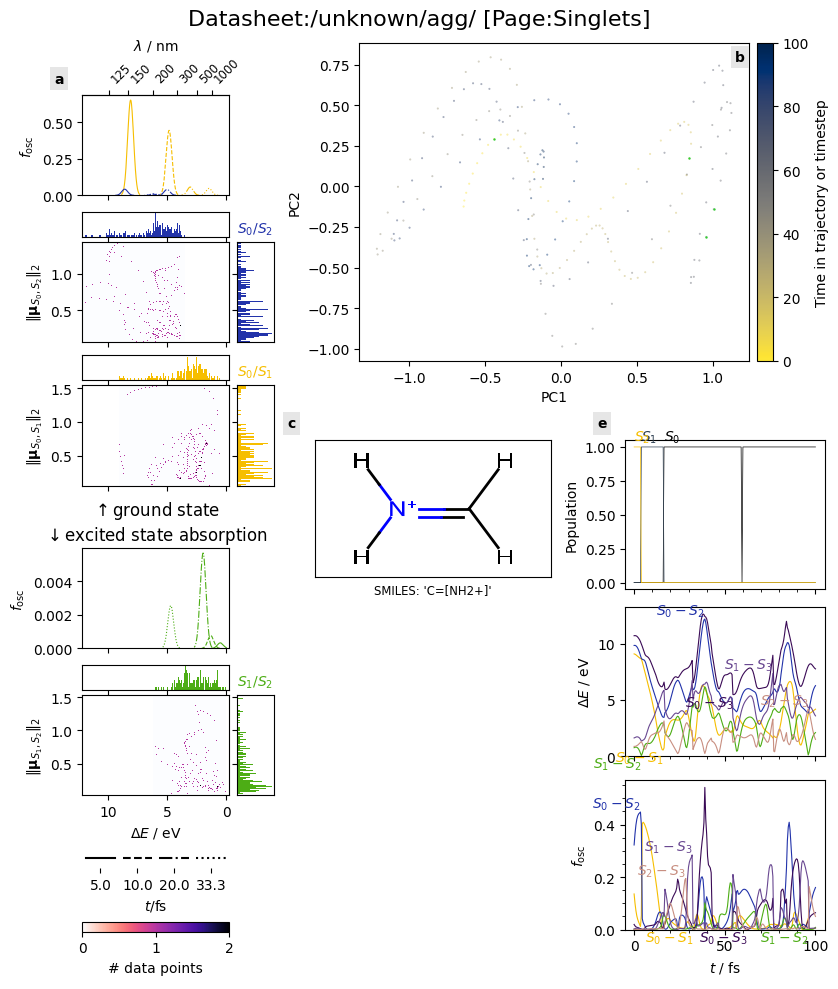

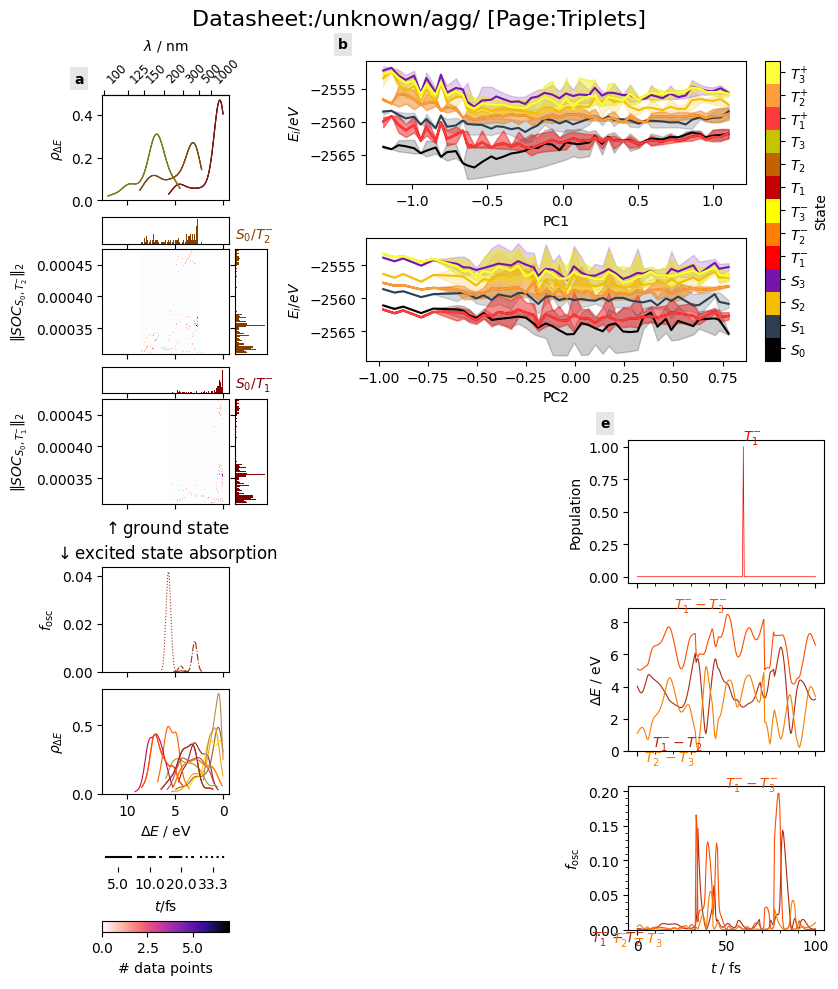

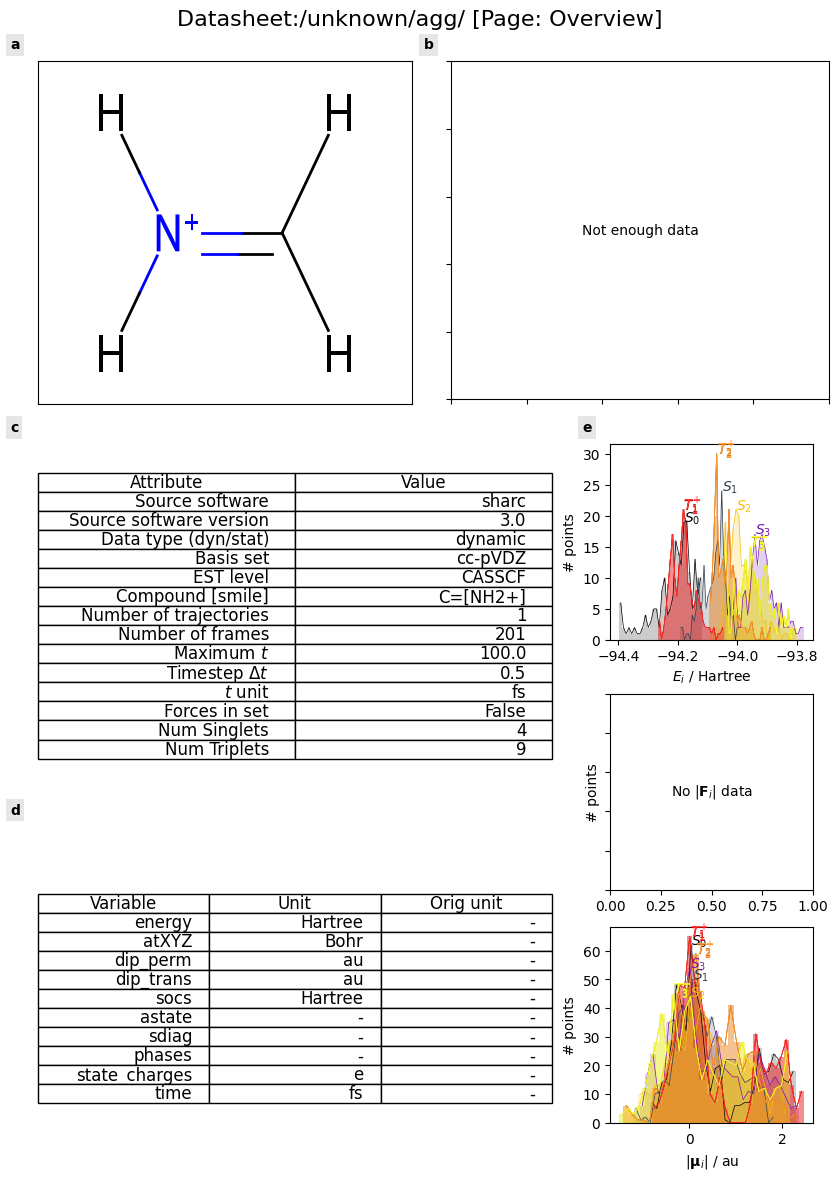

In [3]:
from shnitsel.vis.datasheet import Datasheet

sheet = Datasheet(shnitsel_db_triplet)
# shnitsel_db_triplet
# sheet.datasheet_pages['root'].charge = 1
# sheet.plot(include_pca_page=True, path="./triplet_sharc.pdf")
sheet.plot(
    include_meta_page=True, include_coupling_page=False, path="./triplet_sharc.pdf"
)
# sheet.datasheet_pages

/home/tpadmin/git/shnitsel-tools-official/.venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/tpadmin/git/shnitsel-tools-official/.venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/tpadmin/git/shnitsel-tools-official/.venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/tpadmin/git/shnitsel-tools-official/.venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc
/home/tpadmin/git/shnitsel-tools-official/.venv/lib/python3.12/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multipl

Rendering coupling page for 13 states with at least 78 relevant state transitions.


100%|██████████| 78/78 [00:00<00:00, 360.16it/s]


[ 0.46417263 -0.05400548 -0.14210635  0.4285767   0.04515151  0.45778954
 -0.11395222 -0.09756747  0.21683291 -0.16960978  0.41240952 -0.04221231
  0.02325607 -0.30591253 -0.04324032]
[ 0.09292149 -0.07213845 -0.31556063 -0.06588708 -0.00131378 -0.31488577
 -0.00062233  0.23539386  0.22060339 -0.44910881 -0.23575161 -0.04775927
  0.33894847 -0.28513171  0.4725104 ]
Saving datasheet as pdf. Please be patient, this may take some time.


Written: 100%|██████████| 1/1 [00:08<00:00,  8.95s/page]

Writing pdf with 5 pages


{'/unknown/agg/': [<Figure size 827x974.167 with 15 Axes>,
  <Figure size 827x974.167 with 15 Axes>,
  <Figure size 650x650 with 169 Axes>,
  <Figure size 827x1169 with 8 Axes>,
  <Figure size 827x1169 with 7 Axes>]}

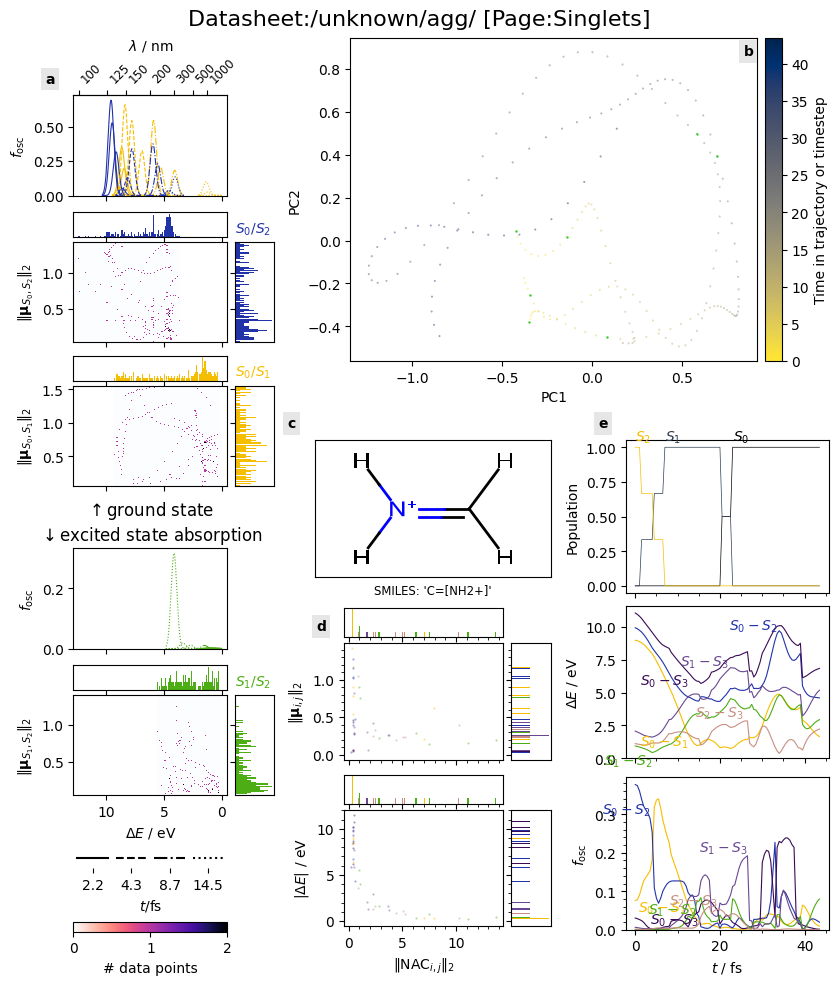

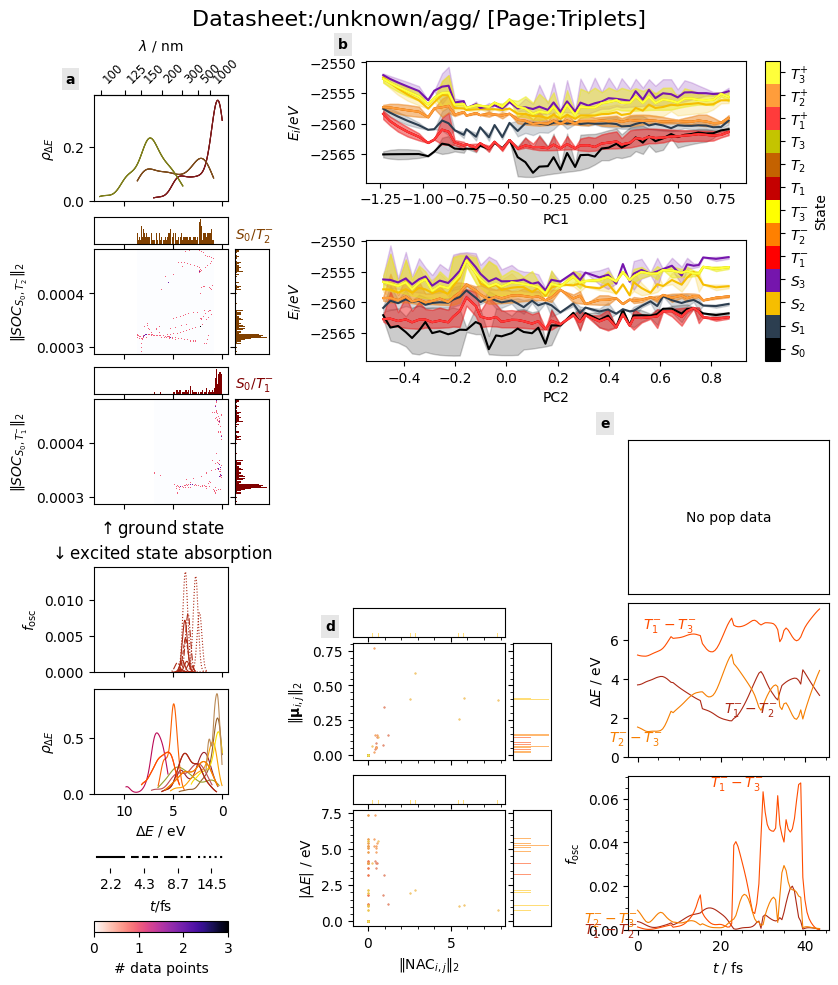

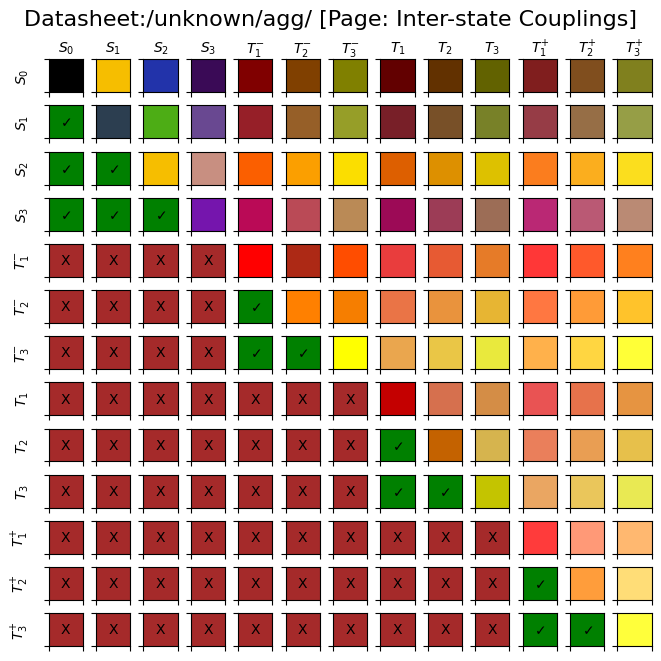

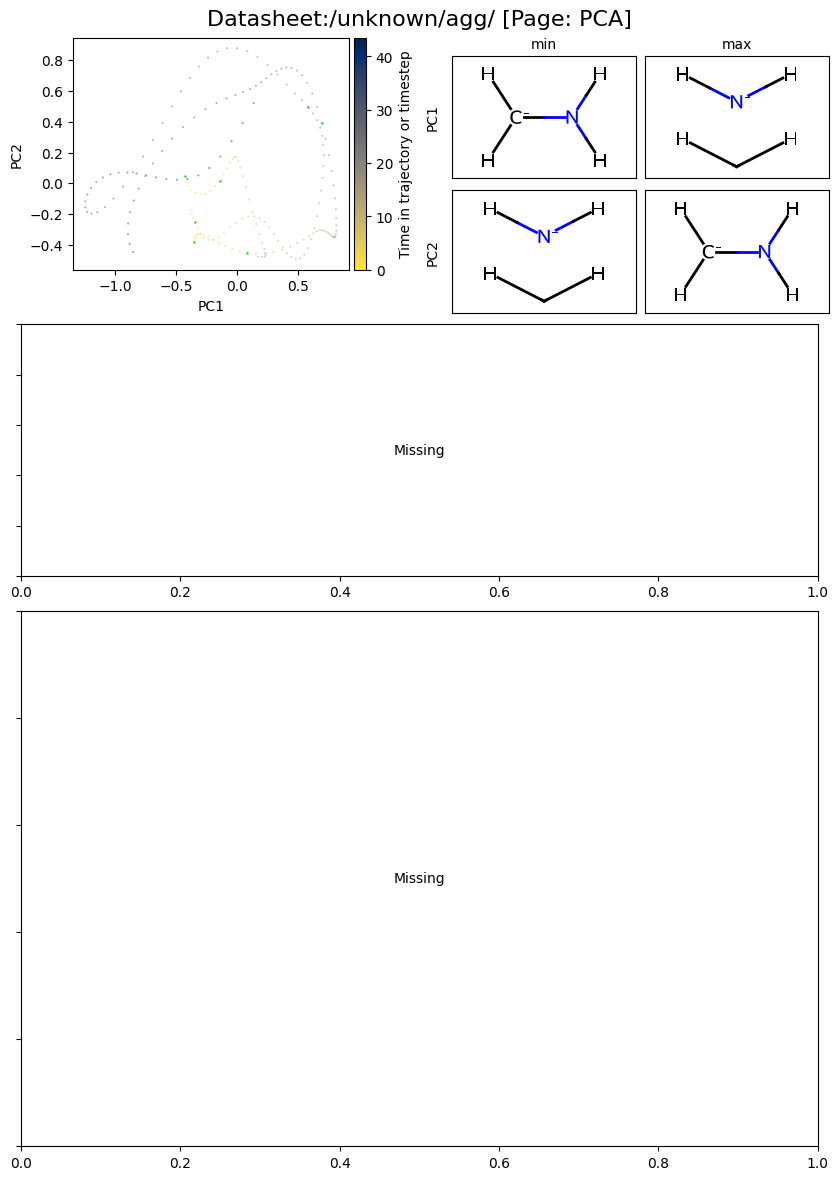

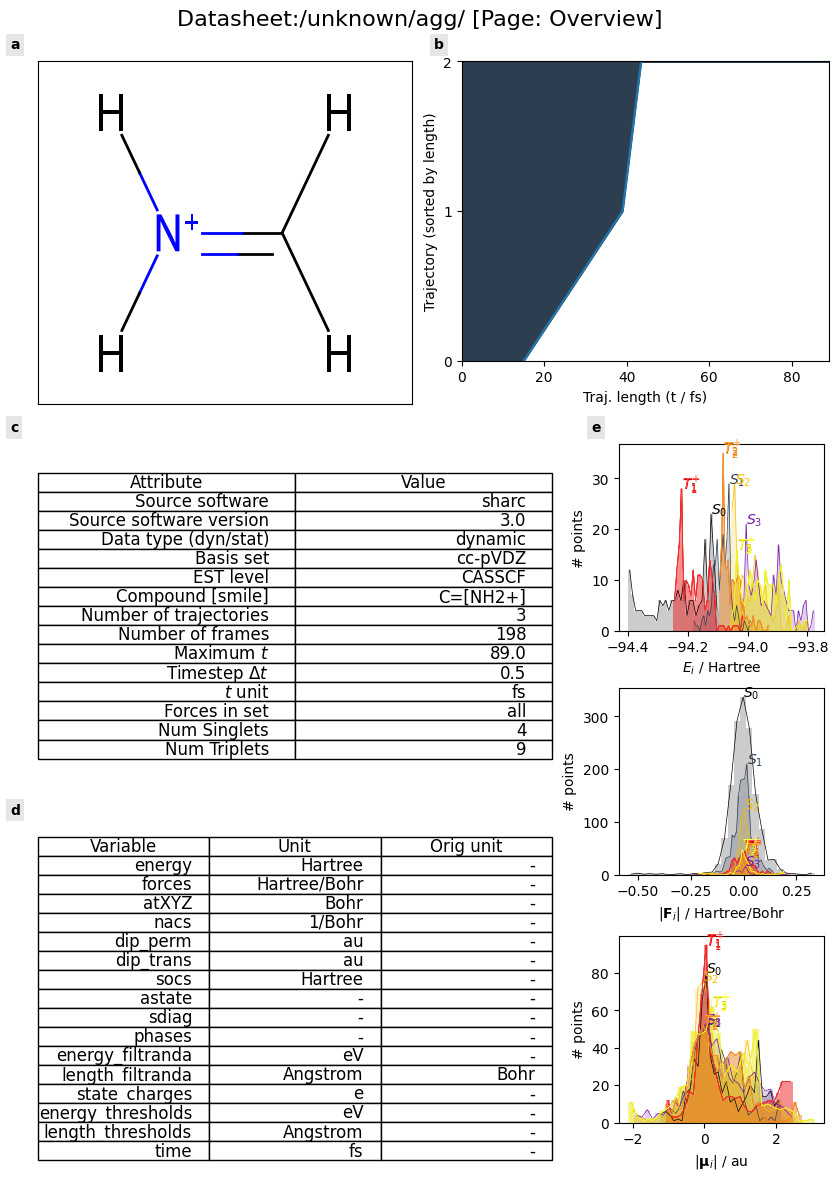

In [5]:
from shnitsel.clean import sanity_check
sheet = Datasheet(sanity_check(shnitsel_db_full, drop_empty_trajectories=True))
# sheet.datasheet_pages['root'].charge = 1
sheet.plot(
    include_pca_page=True, include_meta_page=True, path="./triplet_sharc_full.pdf"
)
# sheet.plot( path="./triplet_sharc_full.pdf")
# sheet.datasheet_pages
# sheet.datasheet_pages[list(sheet.datasheet_pages.keys())[0]].per_state

In [ ]:
%time sheet.calc_all()

CPU times: total: 0 ns
Wall time: 1.59 ms


[12:22:47] WARNING: Proton(s) added/removed



In [ ]:
%time sheet.plot_per_state_histograms()

CPU times: total: 0 ns
Wall time: 0 ns


AttributeError: 'Datasheet' object has no attribute 'plot_per_state_histograms'

In [ ]:
%time sheet.plot_timeplots()

In [ ]:
%time sheet.plot_separated_spectra_and_hists()

In [ ]:
%time fig = sheet.plot()

In [ ]:
# fig.savefig('/tmp/ethene.png')

## Alkene datasheets

In [ ]:
from glob import iglob

for path in iglob('/nc/Theo_SHNITSEL/filtered/*.nc'):
    print(path)

    sheet = sh.plot.Datasheet(path=path)
    sheet.plot()

## Methylenimmonium

In [ ]:
sheet = sh.plot.Datasheet(path='/nc/Theo_SHNITSEL/unfiltered/CH2NH2_time.nc')
sheet.charge = 1
sheet.plot()

## Save all datasheets

In [ ]:
import os

os.mkdir('/tmp/datasheets')
os.chdir('/nc/SHNITSEL_databases/dynamic/')
paths = dict(
    I01='I01_ch2nh2_dynamic.nc',
    A01='A01_ethene_dynamic.nc',
    A02='A02_propene_dynamic.nc',
    A03='A03_butene_dynamic.nc',
    R01a='R01a_chd50_dynamic.nc',
    R01b='R01b_chd25_dynamic.nc',
)
for ref, path in paths.items():
    sheet = sh.plot.Datasheet(path=path)
    fig = sheet.plot()
    fig.set_dpi(400)
    fig.savefig(f'/tmp/datasheets/{ref}.pdf')
    fig.savefig(f'/tmp/datasheets/{ref}.png')